In [1]:
# !conda install -y -c plotly plotly
import os
import re   
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
#crate paths for csv files
CURR_DIR = os.getcwd()
print(CURR_DIR)
data_path = os.path.join(CURR_DIR, 'datasets/Sleeve-textured.csv')

/Users/w.szczawinski/Projects/master-thesis/analyses


In [12]:
df = pd.read_csv(data_path, sep=';', decimal=',')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99767 entries, 0 to 99766
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Number In Batch  99767 non-null  int64  
 1   Count            99767 non-null  int64  
 2   Time (ms)        99767 non-null  int64  
 3   Timestamp        99767 non-null  object 
 4   Trigger          99767 non-null  object 
 5   obl X            99767 non-null  object 
 6   obl Y            99767 non-null  object 
 7   Odczyt Z         99767 non-null  float64
 8   Odczyt otwor     99767 non-null  object 
 9   Odczyt wał       99767 non-null  object 
 10  Kat obrotu       99767 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 8.4+ MB


In [13]:
df = df.drop(['Number In Batch', 'Count', 'Time (ms)', 'Timestamp', 'Trigger'], axis = 1)

df


obl X    obl Y  Odczyt Z Odczyt otwor   Odczyt wał  Kat obrotu
0      0,2654   0,0000   -37.206       0,2654  Under Range        0.00
1      0,2654   0,0000   -37.206       0,2654  Under Range        0.00
2      0,2654   0,0000   -37.206       0,2654  Under Range        0.00
3      0,2654   0,0000   -37.206       0,2654  Under Range        0.00
4      0,2654   0,0000   -37.206       0,2654  Under Range        0.00
...       ...      ...       ...          ...          ...         ...
99762  0,2718  -0,0029     0.070       0,2718  Under Range       -0.61
99763  0,2718  -0,0029     0.070       0,2718  Under Range       -0.61
99764  0,2718  -0,0029     0.070       0,2718  Under Range       -0.61
99765  0,2718  -0,0029     0.070       0,2718  Under Range       -0.61
99766  0,2718  -0,0029     0.070       0,2718  Under Range       -0.61

[99767 rows x 6 columns]

In [16]:
df = df[df["obl X"].str.contains("Over Range")==False]
df = df[df["obl X"].str.contains("Under Range")==False]
for col in ['obl X', 'obl Y']:
    df[col] = pd.to_numeric(df[col].apply(lambda x: re.sub(',', '.', str(x))))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96275 entries, 0 to 99766
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   obl X         96275 non-null  float64
 1   obl Y         96275 non-null  float64
 2   Odczyt Z      96275 non-null  float64
 3   Odczyt otwor  96275 non-null  object 
 4   Odczyt wał    96275 non-null  object 
 5   Kat obrotu    96275 non-null  float64
dtypes: float64(4), object(2)
memory usage: 5.1+ MB


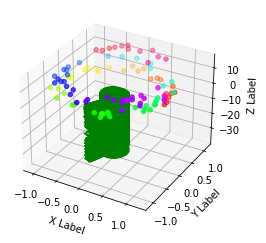

In [17]:
ax = plt.axes(projection ='3d')

x = df['obl X']
y = df['obl Y']
z = df['Odczyt Z']

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.plot3D(x, y, z, 'green')


z_points = 15 * np.random.random(100)
x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv')

plt.show()

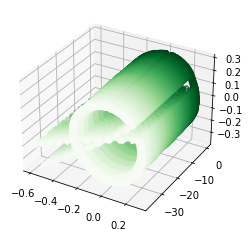

In [18]:
ax = plt.axes(projection ='3d')

x = df['obl X']
y = df['obl Y']
z = df['Odczyt Z']
ax.scatter3D(y, z, x, c=z, cmap='Greens');
plt.show()

In [25]:
import plotly.graph_objects as go
import numpy as np


fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers')])
fig.show()